# Introduction 😃😃

## The Car 🚗🚗 😃

- This dataset for work - DNN Classifier in TensorFlow / Multi classification

### About the Columns

- buying = Is there an interest in buying?
- maint = Car needs maintenance
- doors = The number of car doors
- persons = The number of car passenger
- lug_boot= The size luggage
- safety = Safety rate in the car
- rating =Car performance evaluation



# Mission :

- Make  DNN Classifier in TensorFlow about Rating  column 
- [acc  = acceptable / good  / unacc = unacceptable / vgood= Very good ]



# * Analyze and Explore DataSet 😃❤️🤝

In [1]:
#Importing the basic librarires and deep learning librarires 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
import tempfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Importing the dataset
df =pd.read_csv("../input/the-cars/car1.csv")


# look the data set
df.head()

,buying,maint,doors,persons,lug_boot,safety,rating
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# looking the shape DataSet
df.shape

(1728, 7)

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   rating    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
#checking null value 
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
rating      0
dtype: int64

- No missing value

# Some Visualizations 😃❤️🤝

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


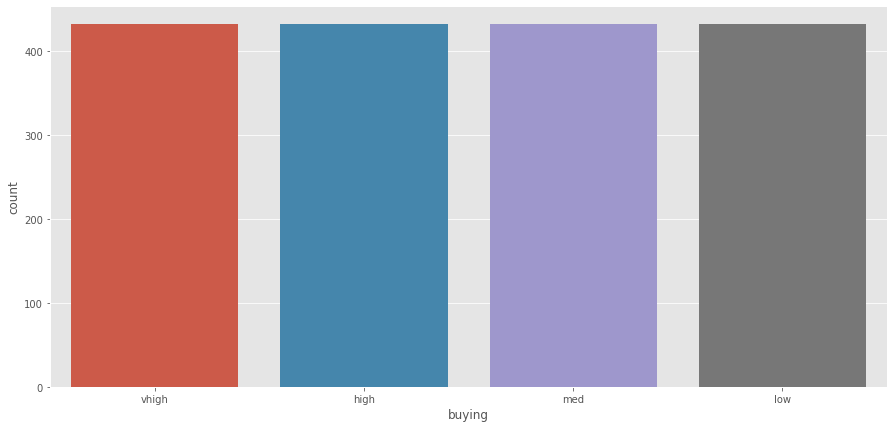

In [6]:
# show the relation buying
plt.figure(figsize=(15,7))
sns.countplot(df["buying"])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='maint', ylabel='count'>

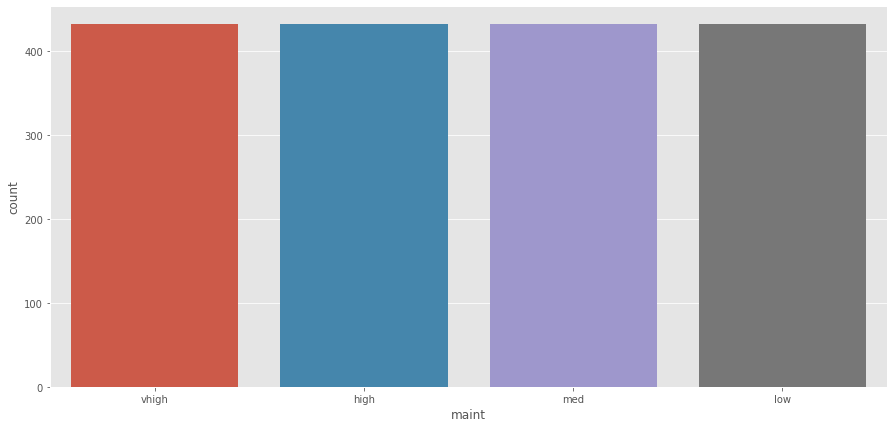

In [7]:
# show the relation maint
plt.figure(figsize=(15,7))
sns.countplot(df["maint"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='doors', ylabel='count'>

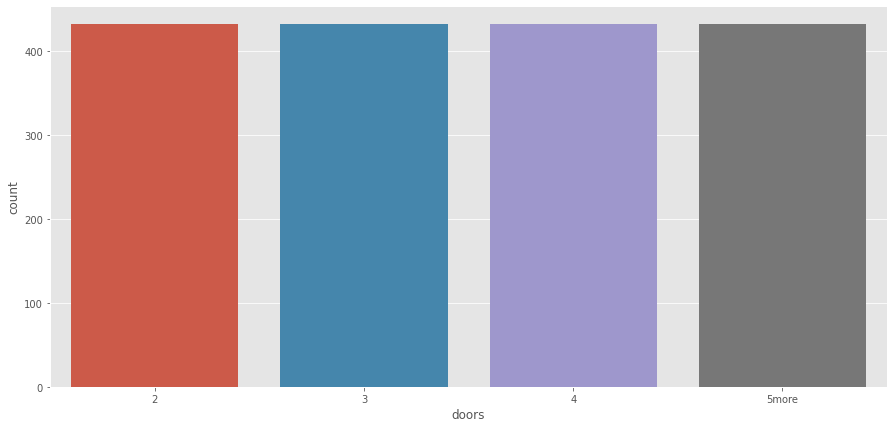

In [8]:
# show the relation doors
plt.figure(figsize=(15,7))
sns.countplot(df["doors"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='persons', ylabel='count'>

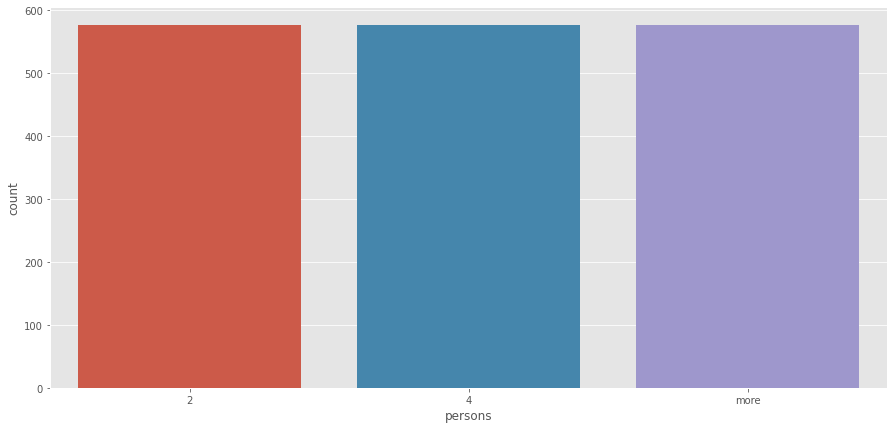

In [9]:
# show the relation persons size
plt.figure(figsize=(15,7))
sns.countplot(df["persons"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='lug_boot', ylabel='count'>

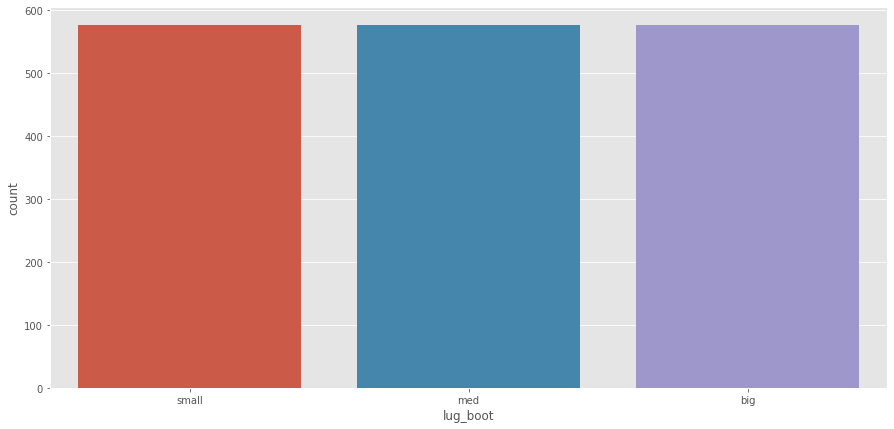

In [10]:
# show the relation luggage 
plt.figure(figsize=(15,7))
sns.countplot(df["lug_boot"])

# Mision 
### Make Multi classification using TensorFlow about Rating column.

#### First we need convert all the category value to integer using LabelEncoder

In [11]:
#Defined X value and y value , and split the data train

X = df.drop(columns="rating")           
y = df["rating"]    # y = quality
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1296, 6)
X Test  :  (432, 6)
Y Train :  (1296,)
Y Test  :  (432,)


In [12]:
# replace the object datatype to int 

# separate the columns numerical and category

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=df[num]   # new dataframe just type numeric
data_c=df[cat]  # new dataframe just type object

In [13]:
# change the columns type object to numeric
label_encoders = {}
categorical_columns = data_c.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

In [14]:
 # merge 2 data set 
frames = [data_c, data_n]
  
data1 = pd.concat(frames,axis=1)
data1.head()

,buying,maint,doors,persons,lug_boot,safety,rating
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [15]:
#information Dataset
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   rating    1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [16]:
# Rating column has 4 categories 
data1["rating"].value_counts()

2    1210
0     384
1      69
3      65
Name: rating, dtype: int64

In [17]:
#Defined X value and y value , 

X = data1.drop(columns="rating")           
y = data1["rating"]    # y = quality

In [18]:
# becaues we have 4 categories , we should make y 4 colums , this Multi classification in TF
y_cat = tf.keras.utils.to_categorical(y)


In [19]:

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1296, 6)
X Test  :  (432, 6)
Y Train :  (1296, 4)
Y Test  :  (432, 4)


# TensorFlow 

In [20]:
# Model definition

M_Class = keras.models.Sequential([
    #keras.layers.Input(shape=30),
    keras.layers.Dense(8,activation='tanh'),
    keras.layers.Dense(128,activation="tanh"),
    keras.layers.Dense(64,activation="tanh"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4,activation='softmax'),  # choose 4 because we have 4 categories
    
])



In [21]:
# make compile 
M_Class.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [22]:
#fit the model

Fit_M= M_Class.fit(X_train,y_train,
              validation_data=(X_test,y_test),
               epochs=100,
              batch_size=1000, 
               verbose=1,
              callbacks=[ tf.keras.callbacks.EarlyStopping(
              patience=10,monitor='val_accuracy',restore_best_weights=True)])

Epoch 1/100
2/2 [==============================] - 1s 277ms/step - loss: 1.4518 - accuracy: 0.2261 - val_loss: 1.2152 - val_accuracy: 0.4792
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 1.1866 - accuracy: 0.5208 - val_loss: 1.0495 - val_accuracy: 0.6551
Epoch 3/100
2/2 [==============================] - 0s 43ms/step - loss: 1.0187 - accuracy: 0.6806 - val_loss: 0.9687 - val_accuracy: 0.6829
Epoch 4/100
2/2 [==============================] - 0s 42ms/step - loss: 0.9306 - accuracy: 0.7022 - val_loss: 0.9389 - val_accuracy: 0.6852
Epoch 5/100
2/2 [==============================] - 0s 43ms/step - loss: 0.9028 - accuracy: 0.7014 - val_loss: 0.9255 - val_accuracy: 0.6852
Epoch 6/100
2/2 [==============================] - 0s 44ms/step - loss: 0.8811 - accuracy: 0.7060 - val_loss: 0.9091 - val_accuracy: 0.6875
Epoch 7/100
2/2 [==============================] - 0s 45ms/step - loss: 0.8537 - accuracy: 0.7076 - val_loss: 0.8868 - val_accuracy: 0.6829
Epoch 8/100
2/2 [==

- The Accuracy 68% not very good, but this multi classification.
- Note : you can change the epochs ans batch size  for better result 

In [23]:
# Model Summary 

M_Class.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 9,724
Trainable params: 9,724
Non-trainable params: 0
_________________________________________________________________


In [24]:
# let show the Model loss and accuracy 

Model_loss, Model_Accuracy = M_Class.evaluate(X_test,y_test)
print("Model Loss : " ,Model_loss )
print("Model Accuracy : " ,Model_Accuracy )

14/14 [==============================] - 0s 2ms/step - loss: 0.9091 - accuracy: 0.6875
Model Loss :  0.9090810418128967
Model Accuracy :  0.6875


In [25]:
# make y prediction 

y_pred = M_Class.predict(X_test)

In [26]:
# show the Y predict

y_pred

array([[0.22181344, 0.11309424, 0.5515263 , 0.11356603],
       [0.0870496 , 0.03869331, 0.8350806 , 0.03917648],
       [0.17783578, 0.05908407, 0.7132289 , 0.04985128],
       ...,
       [0.17274453, 0.03948947, 0.7558363 , 0.03192957],
       [0.1308994 , 0.04024272, 0.79268134, 0.03617652],
       [0.20572719, 0.04588551, 0.71630573, 0.03208144]], dtype=float32)

- You see , we have 4 columns . we should adjusted

In [27]:
N_y_pred= [np.argmax(i) for i in y_pred]
N_y_test = [np.argmax(i) for i in y_test]

In [28]:
# the classifcation Report
C_R = classification_report(N_y_test,N_y_pred)
print("The Classification Report : \n", C_R)

The Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.04      0.07       103
           1       0.00      0.00      0.00        15
           2       0.69      1.00      0.81       294
           3       0.00      0.00      0.00        20

    accuracy                           0.69       432
   macro avg       0.37      0.26      0.22       432
weighted avg       0.66      0.69      0.57       432



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#make confusion Matrix
C_M = confusion_matrix(N_y_test,N_y_pred)
C_M

array([[  4,   0,  99,   0],
       [  0,   0,  15,   0],
       [  1,   0, 293,   0],
       [  0,   0,  20,   0]])

<AxesSubplot:>

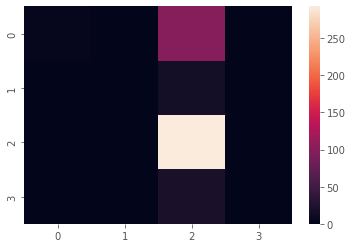

In [30]:
sns.heatmap(C_M)

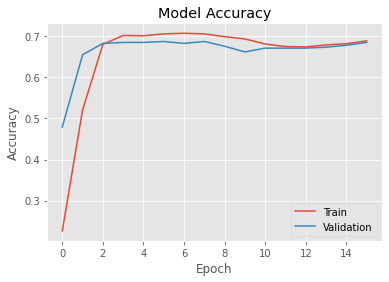

In [31]:
# Drow the graph to show the Model Accuracy 

plt.plot(Fit_M.history["accuracy"])
plt.plot(Fit_M.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"])
plt.show()

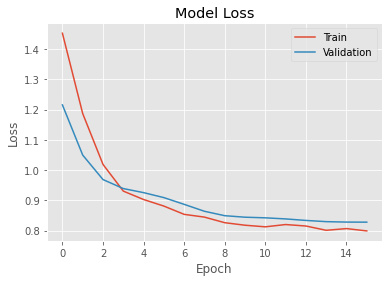

In [32]:
# Drow the graph to show the Model Loss 

plt.plot(Fit_M.history["loss"])
plt.plot(Fit_M.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"])
plt.show()

 <div style = 'border : 3px solid non; background-color:#ffffff;font-family:Gabriola;color:#000080; ; ;padding:10px'>
<p style="font-family:Georgia;padding:20px;line-height:25px;";><font style="font-family:Georgia; font-size:150%;">   </font>
    <p style = "font-size:200%; color:#800080"> 📌 Result ML</p>

- For me I prefer using FT for 2 category not good, the accuracy not very good in Multi classification


#  📲 Connect me:
-  <a href="https://www.kaggle.com/qusaybtoush1990">kaggle</a>
-  <a href="https://www.linkedin.com/in/qusayal-btoush/">Linkedin</a>
-  <a href="https://github.com/qusaybtoush">github</a>

# Vote ❤️😃
- Please Upvote my kernel if you like my work.🙌

# The End 🤝🎉🤝🎉
### 🖐 Thank you 🙏